# <img style="float: left; padding-right: 10px; width: 200px" src="https://raw.githubusercontent.com/trivikverma/researchgroup/master/assets/media/logo.png"> EPA-122A Introduction to *Spatial* Data Science 


## Assignment 1: Data Collection and Wrangling


---



# ``Instructions``

This assignment puts together what you learned in **Weeks 1-2**. You will be working with a dataset which is in the form of a spreadsheet. It may contain many different data types in the columns. All data frames contain column names, which are strings, and row indices, which are integers. In this assignment you will illustrate your knwoledge about bundling various kinds of data together to be able to do higher-level tasks.

_Note:_ Go through **labs and homeworks 00-02** before starting this assignment. 

#### 1.1 Submission

Please submit the results by Brightspace under **Assignment 01**, using a single file as example,

```text
firstname_secondname_thirdname_lastname_01.html

```

**If your file is not named in lowercase letters as mentioned above, your assignment will not be read by the script that works to compile > 200 assignments and you will miss out on the grades. I don't want that, so be exceptionally careful that you name it properly. Don't worry if you spelled your name incorrectly. I want to avoid a situation where I have 200 assignments all called assignment_01.html**

Please **do not** submit any data or files other than the ``html file``.

#### 1.2 How do you convert to HTML? 

There are 2 ways, 

1. from a running notebook, you can convert it into html by clicking on the file tab on the main menu of Jupyter Lab 
    * File &rightarrow; Export Notebooks as... &rightarrow; Export Notebook to HTML
2. go to terminal or command line and type
    * ``jupyter nbconvert --to html <notebook_name>.ipynb  ``


#### 1.3 Learning Objectives

This assignment is designed to support three different learning objectives. After completing the following exercises you will be able to:

* Explore variables in a dataset
* Manage missing data 
* Reshape data to get it in a form useful for statistical analysis 

#### 1.4 Tasks

This assignment requires you to go through five tasks in cleaning your data. 

1. Reading and summarizing the data.
2. Subsetting the Data. This extracts just the part of the data you want to analyse. 
3. Manage Missing Data. Some data is not available for all objects of interest (rows) or all variables for every object (columns). 
4. Shape the Data. We need to convert the data into a suitable format for analysis. 
5. Saving the Results. The results are saved for future use.

<br/>

***

# ``Critical Data Science``

Throughout the assignment, we encourage you to critically reflect on your choices during the Data Science process. To help you set-up your Critical Data Science process, we have provided you with a 'Guide on Critical Data Science'. Section 3.2 contains a step-by-step approach which each key considerations for each part of the data science process. The guide can be found here: https://trivikverma.github.io/spatial-data-science/resources_index.html#a-guide-to-critical-data-science. Throughout this exercises, you will also find several questions which you can use to reflect on your data science choices. 

<br/>

***

# ``Task 1: Downloading the Data``

For this assignment we are going to use the Den Haag cijfers database as a source of data. The database allows us to investigate a range of socio-economic variables for residents in The Hague. The data consists of time series which in some cases dates back into the seventies. 

You can download the data here as a csv file (You will have to choose the variables and file format yourself):
https://denhaag.incijfers.nl/jive 

Put the data in a convenient location on your computer or laptop, ideally in a folder called **data** which is next to this **jupyter notebook**. I recommend taking a look at the file in a text editor like _zed_ for any system or notepad++ for windows. These will also make your life easy for everything else on your computer. It’s a big file and it may take a while to load onto your laptop and into Python (running on the jupyter labs environment). 

## ``Exercise: Downloading the Data``

**IMPORTANT** make sure your code can run independent of the machine. i.e. 
- Use relative path links instead of absolute paths. If your data folder is named C:/HelloKitty/MyGummyBears/IlovePython/DenHaagData.csv, then your program will not be reproducible on any other machine. Check out this very easy to follow and handy guide on [relative paths](https://www.delftstack.com/howto/python/relative-path-in-python/).
- Organise the data in a folder called `data` and run your notebook next to it organised as follows

```text
├── trivik_verma_01.ipynb
├── data
│   ├── DenHaagData.csv
```

- Load the csv file into Python
- Explore it by looking at first and last 5 rows
- Programatically find and print information on the data,
    - number of columns in the data
    - names of the columns in the data 
    - number of rows in the data (excluding the header names)
    - how many unique neighborhoods in the data
    - how many unique variables are in the data

In [1]:
%matplotlib inline
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display


In [2]:
filename = "DenHaag_education_raw_2.csv"
filepath = os.path.join("data", filename)
print("Path name: {}".format(filepath))

raw_data = pd.read_csv(filepath)
raw_data.rename(columns={"Wijken": "Neighbourhood"}, inplace=True)

print("first 5 rows")
display(raw_data.head(5))
print("last 5 rows")
display(raw_data.tail(5))

print("-" * 50)
print("Column count: %d" % raw_data.shape[1])
print("Column names: " + str(raw_data.columns))
print("Row count: %d" % raw_data.shape[0])
print("Unique district count: %d" % raw_data.Neighbourhood.nunique())
print("Unique district: " + str(raw_data.Neighbourhood.unique()))

unique_variables = pd.Series([x.split(sep="|")[0] for x in raw_data.columns]).drop_duplicates(keep="first", ignore_index=True)
print("Unique variable count: %d" % len(unique_variables))
print("Unique variables: \n" + str(list(unique_variables)))

Path name: data/DenHaag_education_raw_2.csv
first 5 rows


,Neighbourhood,Number of participants in education|2010,Number of participants in education|2011,Number of participants in education|2012,Number of participants in education|2013,Number of participants in education|2014,Number of participants in education|2015,Number of participants in education|2016,Number of participants in education|2017,Number of participants in education|2018,...,Number of HAVO/VWO schools within 10 km|2014,Number of HAVO/VWO schools within 10 km|2015,Number of HAVO/VWO schools within 10 km|2016,Number of HAVO/VWO schools within 10 km|2017,Number of HAVO/VWO schools within 10 km|2018,Number of HAVO/VWO schools within 10 km|2019,Number of HAVO/VWO schools within 10 km|2020,Number of HAVO/VWO schools within 10 km|2021,Number of HAVO/VWO schools within 10 km|2022,Number of HAVO/VWO schools within 10 km|2023
0,"14 Bohemen, Meer en Bos",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15 Kijkduin en Ockenburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16 Kraayenstein en Vroondaal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17 Loosduinen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18 Waldeck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


last 5 rows


,Neighbourhood,Number of participants in education|2010,Number of participants in education|2011,Number of participants in education|2012,Number of participants in education|2013,Number of participants in education|2014,Number of participants in education|2015,Number of participants in education|2016,Number of participants in education|2017,Number of participants in education|2018,...,Number of HAVO/VWO schools within 10 km|2014,Number of HAVO/VWO schools within 10 km|2015,Number of HAVO/VWO schools within 10 km|2016,Number of HAVO/VWO schools within 10 km|2017,Number of HAVO/VWO schools within 10 km|2018,Number of HAVO/VWO schools within 10 km|2019,Number of HAVO/VWO schools within 10 km|2020,Number of HAVO/VWO schools within 10 km|2021,Number of HAVO/VWO schools within 10 km|2022,Number of HAVO/VWO schools within 10 km|2023
40,41 Hoornwijck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,42 Ypenburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,43 Forepark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,44 Leidschenveen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--------------------------------------------------
Column count: 1079
Column names: Index(['Neighbourhood', 'Number of participants in education|2010',
       'Number of participants in education|2011',
       'Number of participants in education|2012',
       'Number of participants in education|2013',
       'Number of participants in education|2014',
       'Number of participants in education|2015',
       'Number of participants in education|2016',
       'Number of participants in education|2017',
       'Number of participants in education|2018',
       ...
       'Number of HAVO/VWO schools within 10 km|2014',
       'Number of HAVO/VWO schools within 10 km|2015',
       'Number of HAVO/VWO schools within 10 km|2016',
       'Number of HAVO/VWO schools within 10 km|2017',
       'Number of HAVO/VWO schools within 10 km|2018',
       'Number of HAVO/VWO schools within 10 km|2019',
       'Number of HAVO/VWO schools within 10 km|2020',
       'Number of HAVO/VWO schools within 10

<br/>

***

# ``Task 2: Hypothesis formulation``

Think about your focus of analysis. What do you want to find out? A first step is to think about what variables might be related with each other and what these relationships could like like. Think also about a causal theory. Why do you expect this relationship to exist and to take on a specific form.

To give you an example from another dataset (this is a dataset of the worldbank: http://data.worldbank.org/data-catalog/world-development-indicators), have a look at the hypothesis below. I chose an analysis focus and then made some asumptions on the relationships between the focus variables. These asumptions are what I want to test as a formal hypothesis later on.

```text
My hypothesis
I’d like to examine world broadband access. For that reason I chose a broadband account variable. The data is organized by country. I want to control for the wealth, population, and land area of the country. I also have a hypothesis that more urban countries are more likely to have good broadband services. There are economies of scale when providing services to a large city. 

I hypothesize that larger countries have lesser access, since it is expensive to provide access over larger areas. On the contrary, countries with a lot of urban land area can take advantage of economies of scale resulting in relatively more broadband users concentrated in smaller zones within the country. We also hypothesize that wealthier countries have better broadband access, since there is a larger market to provide the newest services. A final variable which we add is rail lines. I hypothesize that broadband lines can take advantage of existing infrastructure right-of-ways, of which rail is a surrogate measure. Furthermore, the presence of rail lines may indicate other factors including a geography which is conclusive to physical development, and favourable institutional factors which promote high technology development. 

My choice of variables were, 

| Variable Name                 | Variable Code     |
| ----------------------------- | ----------------- |
| Fixed broadband subscriptions | IT.NET.BBND       |
| GDP (current US$)             | NY.GDP.MKTP.CD    |
| Population, total             | SP.POP.TOTL       |
| Land area (sq. km)            | AG.LND.TOTL.K2    |
| Urban land area (sq. km)      | AG.LND.TOTL.UR.K2 |
| Rail lines (total route-km)   | IS.RRS.TOTL.KM    |

```

Formulate a working hypothesis. Provide a list of variables you need to include in your hypothesis. Explain what your dependent variable is. Explain your choice of independent and control variables. Would you wish to include any variables that is not available? Are there any variables (proxies) present with which you could replace these missing values? Would that have an effect on your outcomes? Think about bias in the data. Why do you expect to find the relationship that you are hypothesising? Can you think of any cases in which this hypothesis will be rejected? Why? Can you think of any cases in which the hypothesis will be falsely rejected or falsely acepted? Think about bias in the data and in your own reasoning. 

## ``Exercise: Hypothesising``

- State your hypothesis in a markdown cell as I showed in the example above (there is no single right hypothesis, you are free to make a **reasonable** choice for this task)
- Find the variables of interest for your hypothesis and mention them in the markdown cell (4-7 variables)
- Explain what your dependent variable is. Explain your choice of independent and control variables.
- Would you wish to include any variables that is not available? Are there any variables (proxies) present with which you could replace these missing values? Would that have an effect on your outcomes? Think about bias in the data. Explain your reasoning.
- Can you think of any cases in which this hypothesis will be rejected? Why?
- Can you think of any cases in which the hypothesis will be falsely rejected or falsely acepted? Think about bias in the data and in your own reasoning.
- Can you shortly reflect if there are any potentially important perspectives that you are not taking into account by choosing this hypothesis?

# Answer

**Objective and dependent variables**

The objective is to investigate indicators affecting school participation and new school drop-out comparing to the number of children in the schooling age range in the year **2020**. The dependent variables are:
1. 'Number of participants in education'
1. 'Number of new school drop-outs'
1. '5 to 14-year-olds'
1. '15 to 19-year-olds'

**Hypotheses and variables**
1. **Distance to schools**: the farther schools are, the less motivated students feel to go and perform well in school. As they perform poorly in secondary schools, they are likely to drop-out, and school participation in these neighbourhoods should be low. In the data, there are variables for schools within 1 to 10km. I hypothesize that since the Den Haag is a populated area, children in the age range 5-19 are likely to go to schools within 3km due to convenience reason. Variables for this hypothesis:
    1. 'Total number of secondary schools within 3 km'
    1. 'Number of VMBO schools within 3 km'
    1. 'Number of HAVO/VWO schools within 3 km'
1. **Marritial status of the household**: it might be hard for family with issues to nurtur and support their children economically and educationally. As a result, the rate of school drop out is high; and the rate of school participation is low. Variables for this hypothesis:
    1. 'Single parent'
1. **Employment**: neighbourhood with low employment can demotivate children from participating in education. As a result, the rate of school drop out is high; and the rate of school participation is low. Variables for this hypothesis:
    1. 'Number of private households with income from employment'
    1. 'Number of employed persons'
1. **Income**: Households with lower income can cause children to neglect education to suppor their family. As a result, the rate of school drop out is high; and the rate of school participation is low. Variables for this hypothesis:
    1. 'Number of private households with income from unemployment benefits/national assistance'
    1. 'Number of private households with income from WIA benefits'
    1. 'Number of private households with a low income'

**Missing Variables**

* I would like to explore the relationship between ethnicity and school participation/drop-out. For this, I need the following data:
    * Count of school participation per ethnic groups. This data is missing from the database. I initially plan to create a proxy for this figure by following these steps:
        * Assuming that the proportion of school participation of different ethnic groups equal that the proportion of ethnic group population in the age range 5-14 and 15-19.
        * Then, multiplying the total number of school participation/dropout by the proportion of each ethnic group, I will obtain the school participation/dropout for each ethnic group.
        * However, I do not have enough evidence to support the assumption for this method. In other words, this approximation can be wrong. As this is the dependent variable, this mistake can affect my entire analysis. Therefore, I decided to not follow through with the approximation.
    
    * Count of people who are 1st, 2nd, 3rd+ generation of immigrants to the Netherland. I hypothesize that the first few generations of immigrants have lower opportunity to access higher education. This could be due to various reasons, such as language barriers or poor living conditions. However, this data is missing from the database. In the database, there are figures on the percentage of immigrants arriving to the different neighbourhoods throughout the years. I intended to use this figure to calculate the number of 1st, 2nd, 3rd+ generation immigrants. However, since there are no data on the age range of the immigrants to match with these percentage, I cannot calculate the number of 1st, 2nd, 3rd+ generation immigrants just based on the percentage of immigrants arriving to the different neighbourhoods throughout the years.


**Valid rejections and false receptions**

* Can you think of any cases in which this hypothesis will be rejected? Why?

* Can you think of any cases in which the hypothesis will be falsely rejected or falsely acepted? Think about bias in the data and in your own reasoning.

* The hypothesis on **Distance to schools** can be taken as a weak argument by referencing to the Dutch puplic transportation system, and the friendliness of the Dutch traffic infrastructure to cyclers and pedestrians. This hypothesis is indeed a weak one if viewed in silo. However, when viewed with the other hypotheses (**Marritial status of the household, Employment, Income**), a more complete picture is formed.

* The hypothesis about **Income** can be used to feed into the narrative against the group of people living on social benefits (e.g.: because they are lazy and only want to benefit from social wellfare, they don't try to find employment. They pass on this attitude to their children, who in turn don't work hard at school and drop-out).


**Missing perspectives**

* **Immigrant** is an important perspective that is left out from this analysis due to the lack of data. This is a disadvantage group in society that would require social support to be on the same ground as the group of people who have sufficient time to settle down and catch up with the pace of the Dutch society.

* **Transportation** is left out from the analysis. There are questions related to transportation, such as:
    * What is the difference in the school dropout/participation rate between children who go to school by themselves vs. those whose parents drop them at school?
    * How does the school dropout/participation rate differ among schools as their respective distance to public transportation stations vary?
    
    These questions touch on the impact of infrastructure on school participation/dropout. The answers to these questions can help identify the group of population that need more support regarding infrastructure.

* **Mental heath** is left out from the analysis. Mental disorders, ranging from affecting emotional stability to impeding learning ability of children, can be a major factor affecting the school participation/dropout.


<br/>

***

# ``Task 2: Subsetting the Data``




From now on we want to work with a subset of the data that is relevant to your study focus. Choose **4 to 7 variables** from your dataset for further exploratory statistics (more information will follow later in exercises). Think carefully about how you want to address the neighboorhoods. Does it make sense to build a new ID or should you use the provided IDs? Remember that it is important to work with codes as opposed to names to make our analyses more reproducible across time. For now let’s set aside the added complexity of time series and dynamics. Our task is to select just one year. 


## ``Exercise: Subsetting the Data``

- Subset your dataframe based on your focus of analysis and your choice of variables. 
- your dataframe would have greatly reduced in size and looks neater, show us what it looks like now using head() or something similar
    - show some statistics like number or rows, columns, names of variables and unique neighbourhoods, etc.
    
You can count the columns manually, but in a large data set like this it is accurate and convenient to let python calculate this for us. Get the index of relevant columns and store them in a variable. 


- You also will want to experiment to see which year you want to use. How likely do you think, your results will change if you choose a different year for your analysis? 
- Do you have enough data/ variables to sufficiently explore your hypothesis? Is something missing? Why? Should you drop variables from your data? Why?


# Answer

**Year selection**

2019 is selected as the year for analysis. This is because:
* This is the year before the COVID-19 pandemic happened. During the COVID-19, there were major lockdowns across all sectors, including schools. The pandemic could have hugely impacted school participation/dropdown while the lockdown measures were in-placed, overriding the impact of the other independent variables.
* After the pandemic and the lockdown period, their impacts are still lingering on society. If using the data collected in  the years post the pandemic, further steps in comparing the situation pre vs. post pandemic era must be taken to give a comprehensive analysis of the dependent and independent variables.

**Data Sufficiency**

In the subsetted data:
* there are 4 neighbourhoods with more than 4 missing features
* there are 5 features with more than 5 missing values

At this stage, it is too early to drop any features or neighbourhood without considerations. So, I decide to retain every variables and neighbourhood at this stage even if they have missing values. There are more in-depth explanations on handling missing data in the next section.

In [3]:
def get_column_name_match_string(dataframe, name_string):
    """Return the list of column names from the input dataframe that contains the name_string
    Parameters:
    dataframe pandas.DataFrame: the input dataframe to retrieve the column names
    name_string str: a string which is a substring of some column names of the input dataframe
    ----------
    Returns:
    list of column names """
    return dataframe.columns[dataframe.columns.str.contains(name_string)]

# get column names from the selected variables
variables = ['Neighbourhood',\
             'Number of participants in education', 'Number of new school drop-outs',\
             '5 to 14-year-olds', '15 to 19-year-olds', \
             'Total number of secondary schools within 3 km', 'Number of VMBO schools within 3 km', \
             'Number of HAVO/VWO schools within 3 km',\
             'Single parent', \
            'Number of private households with income from employment', 'Number of employed persons', \
            'Number of private households with income from unemployment benefits/national assistance', \
             'Number of private households with income from WIA benefits', \
             'Number of private households with a low income']

selected_columns = [] # list of column names
for x in variables:
    selected_columns.extend(get_column_name_match_string(raw_data, x))

subset_data_all_year = raw_data[selected_columns].copy()

# remove columns counting ethnic groups:
excluded_columns = get_column_name_match_string(subset_data_all_year, "CBS")
subset_data_all_year = subset_data_all_year.drop(columns=excluded_columns)

# get column names from the selected years
years = ["2019"]
selected_columns = [] # list of column names
for x in years:
    selected_columns.extend(get_column_name_match_string(subset_data_all_year, x))

subset_data_selected_year = subset_data_all_year[["Neighbourhood", *selected_columns]].copy()

print("first 5 rows")
display(subset_data_selected_year.head(5))
print("last 5 rows")
display(subset_data_selected_year.tail(5))

print("-" * 50)
print("Column count: %d" % subset_data_selected_year.shape[1])
print("Column names: " + str(subset_data_selected_year.columns))
print("Row count: %d" % subset_data_selected_year.shape[0])
print("Unique district count: %d" % subset_data_selected_year.Neighbourhood.nunique())
print("Unique district: " + str(subset_data_selected_year.Neighbourhood.unique()))

print("Unique variable count: %d" % len(variables))
print("Unique variables: \n" + str(list(variables)))

first 5 rows


,Neighbourhood,Number of participants in education|2019,Number of new school drop-outs|2019,5 to 14-year-olds|2019,15 to 19-year-olds|2019,Total number of secondary schools within 3 km|2019,Number of VMBO schools within 3 km|2019,Number of HAVO/VWO schools within 3 km|2019,Single parent|2019,Number of private households with income from employment|2019,Number of employed persons|2019,Number of private households with income from unemployment benefits/national assistance|2019,Number of private households with income from WIA benefits|2019,Number of private households with a low income|2019
0,"14 Bohemen, Meer en Bos",203,5,308,174,NaN,NaN,NaN,234,1272.0,1152.0,49.0,76.0,1169.0
1,15 Kijkduin en Ockenburgh,112,x,197,185,NaN,NaN,NaN,106,481.0,1426.0,10.0,10.0,258.0
2,16 Kraayenstein en Vroondaal,348,7,695,295,NaN,NaN,NaN,393,1719.0,1573.0,49.0,75.0,793.0
3,17 Loosduinen,1189,35,1801,942,NaN,NaN,NaN,1389,4590.0,12056.0,490.0,382.0,3652.0
4,18 Waldeck,833,19,1456,673,NaN,NaN,NaN,1221,4141.0,7432.0,601.0,391.0,4659.0


last 5 rows


,Neighbourhood,Number of participants in education|2019,Number of new school drop-outs|2019,5 to 14-year-olds|2019,15 to 19-year-olds|2019,Total number of secondary schools within 3 km|2019,Number of VMBO schools within 3 km|2019,Number of HAVO/VWO schools within 3 km|2019,Single parent|2019,Number of private households with income from employment|2019,Number of employed persons|2019,Number of private households with income from unemployment benefits/national assistance|2019,Number of private households with income from WIA benefits|2019,Number of private households with a low income|2019
40,41 Hoornwijck,42,x,21,34,NaN,NaN,NaN,11,54.0,5020.0,22.0,4.0,65.0
41,42 Ypenburg,3140,59,4559,2402,NaN,NaN,NaN,2330,7517.0,5520.0,451.0,392.0,2558.0
42,43 Forepark,6,x,x,9,NaN,NaN,NaN,5,NaN,9728.0,NaN,NaN,NaN
43,44 Leidschenveen,2328,32,3609,1708,NaN,NaN,NaN,1428,5789.0,4932.0,183.0,197.0,1424.0
44,Unknown,267,33,NaN,NaN,NaN,NaN,NaN,NaN,51.0,NaN,-301.0,36.0,-57.0


--------------------------------------------------
Column count: 14
Column names: Index(['Neighbourhood', 'Number of participants in education|2019',
       'Number of new school drop-outs|2019', '5 to 14-year-olds|2019',
       '15 to 19-year-olds|2019',
       'Total number of secondary schools within 3 km|2019',
       'Number of VMBO schools within 3 km|2019',
       'Number of HAVO/VWO schools within 3 km|2019', 'Single parent|2019',
       'Number of private households with income from employment|2019',
       'Number of employed persons|2019',
       'Number of private households with income from unemployment benefits/national assistance|2019',
       'Number of private households with income from WIA benefits|2019',
       'Number of private households with a low income|2019'],
      dtype='object')
Row count: 45
Unique district count: 45
Unique district: ['14 Bohemen, Meer en Bos' '15 Kijkduin en Ockenburgh'
 '16 Kraayenstein en Vroondaal' '17 Loosduinen' '18 Waldeck'
 '31 Rus

<br/>

***

# ``Task 3: Manage Missing Data``

Datasets often have missing data. Not all variables are as well documented for every year as others. There are a number of ways in general of dealing with missing data. These involve

1. Dropping off cases (or rows) in the data with any missing variables
2. Excluding variables in the data with any missing data 
3. Selectively choosing indicators with only a limited amount of missing data
4. Replacing missing variables with averages, or other representative values
5. Creating a separate model to predict missing data

In this assignment we are going to use a number of these strategies. We can certainly be dropping off cases (strategy one). I am loathe to drop off whole indicators. But we can, for example, choose a year for the indicator where most of the data is available (strategy three).

Building a separate model to impute missing data, is often a good idea. But that requires a first working model before we even consider building a missing data model (and we haven't gotten there yet in this course); the working model and the missing data model are often constructed together. Note also that there are packages in Python which will construct a model of your data, and then impute missing values for you. You may or may not find these functions and packaging for modelling your data to be fully appropriate. Therefore treat these missing data models very seriously, and not as a black box. Models of missing data are as important, and deserve just as much care and caution as any other statistical model.  

In the next section I discuss some specifics about how the data is currently formatted, and how we would like to have it formatted for analysis purposes. 

## ``Exercise: Manage Missing Data``
- Explore and handle the missing data in your data set using one of the methods mentioned above. Visualize your findings if necessary. Think about potential explanations for gaps in the data. Think about what stage of the process led to the data gaps? Are the gaps going to be a problem for your analysis? Why? 
- Explain your choice of method. Can you think of ways how the chosen method skews your results? Did your data quality increase? Why? 
- At this stage, reflect on your choices along the way. Should you reiterate (e.g. choose a different focus/ hypothesis/ year for your analysis)? Why? 
- Also shortly reflect what the data gaps might mean. Are there collections of variables for which data is structurally missing? Are there neighbourhoods for which data is structurally missing? What can cause these structural gaps in the data? 

# Answer

**Identify missing values**
In the subsetted data:
* there are 4 neighbourhoods with more than 4 missing features, in the range from 6 to 10 missing features 
* there are 5 features with more than 5 missing values
    * 1 is the dependent variable: 'Number of school drop-out' with 13 missing values
    * 3 are the independent variables related to the hypothesis **Distance to schools** with 45 missing values
    * 1 is the independent variable related to the hypothesis **Income** with 5 missing values

**Manage missing values**

1. There are some symbols in data to replace missing values. They are: 'x', '-'. Additionnally, there are negative values for some neighbourhood. These negative values are non-sense because the variables indicate positive numbers (either integer or float). So, to fill missing values, the following cleaning steps are taken:
    1. replace nan strings and negative values with np.nan
    1. convert the data to type "float32"

1. For each **selected variables**, if there is a missing value from a year, use the data from the last valid year to fill in the missing value. This method is selected because:
    * Assuming that the population is stable, there are few changes in the figures.
    * Using the mean/median/mode values across the years will create some jupms on the data. These jumps can cause the data pattern to fluctuate, affecting the underlying patterns of the data. Consequently, the analysis will be skewed.

1. Rows with many Nan values: each row represents a neighbourhood. If a neighbourhood has no data, then they will be removed from the dataframe. This is because:
    1. as different neighbourhood have different characteristics (demographics, area, infrastructure, etc.), using the data of one neighbourhood to fill in that of another will distort the underlying characteristics of that neighbourhood. For instance, the data for 'Number of private households with a low income' of a rich neighbourhood is missing from the dataset. However, as the average 'Number of private households with a low income' across all neighbourhoods is closer to the real figure of a lower-middle class neighbourhood, using this figure to fill in the data for the rich neighbourhood can distort the entire observation of this neighbourhood.
    1. Further more, from the histogram of missing values, more than 30 neighbourhoods has 0 missing values, where as about 10 of them have at least 1 missing variable/feature. So, as all neighbourhoods with any missing values is removed from the data, there are still sufficient data remained for the analysis.
    1. By doing this, I am consciously removing different groups in the population from the analysis. One of the short-comings of this exclusion is that the reasons for the missing data is not identified and addressed. If these excluded neighbourhoods are the ones requiring the most support, then excluding them defeats the purpose of the analysis. If, on the other hand, these excluded neighbourhood don't require any support in general, then excluding them means that some desirable patterns are missed out from the solution pools to the problem of school dropout. Either way, it is not desirable to leave out these populations without identifying and address the missing data issue.

1. Variable with all NaN value: It is impossible to use data from other variable to fill in the missing data of another variable. So, any variable with all NaN values will be removed.
    1. Initially, I wanted to examine the percentage of ethnic groups in a neighbourhood as an independent variable. However, due to the lack of percentage of school dropout/participation on ethnic groups, this variable is a weak link in the analysis. Therefore, I have to drop the the percentage of ethnic groups as a variable.

1. Column: **'Number of schools within 1 km'** and **'Number of schools within 3 km'**
    * because the variable 'Number of schools within 1 km' and 'Number of schools within 3 km' are missing from the data, I replace it with 3 other variables, namely 'Total number of secondary schools within 3 km', 'Number of VMBO schools within 3 km', 'Number of HAVO/VWO schools within 3 km'. In the final dataframe, I will sum these 3 variables to create a new column "Total secondary schools within 3km". By doing this,
        * the group of children aged 5-11 are left out of the analysis. As children drop out at this stage, they will also miss the chance of continuing their education at the secondary level and above. So, this is another perspectives worth considering as it offers a more complete general picture. However, because they are left out, the hypthesis about **Distance to schools** must be changed to a more limited scope - secondary school children and secondary school distance only.
    * even for the 3 newly selected variables 'Total number of secondary schools within 3 km', 'Number of VMBO schools within 3 km', 'Number of HAVO/VWO schools within 3 km', there are only data available up to 2013. I will use the data of the year 2013 to fill in the missing data for 2019 under the assumption that:
        * As school constructions require thorough planning (population demography, land availability, infrastructure, etc.), the number of schools within a peripheral distance from a district doesn't greatly change over the year.
     
1. Create new column '5 to 19 year-olds|2019': There are only separate data on the age range 5-14 and 15-19 year-old children. To create the '5 to 19 year-olds|2019' ccolumn, I will sum the two columns with data on the age range 5-14 and 15-19.
     
**Reflections about missing data**
* There are missing data for the population groups that are most likely have difficulties with participating in education, such as the first few generations of immigrants. Yet, these are the groups that would benefit the most if the underlying problems and the solutions are identified.
* On the other hand, if there are only available data for the population group that don't face difficulties participating in educations, the analysis can falsely support that the problem doesn't exist, and that no solutions are required.

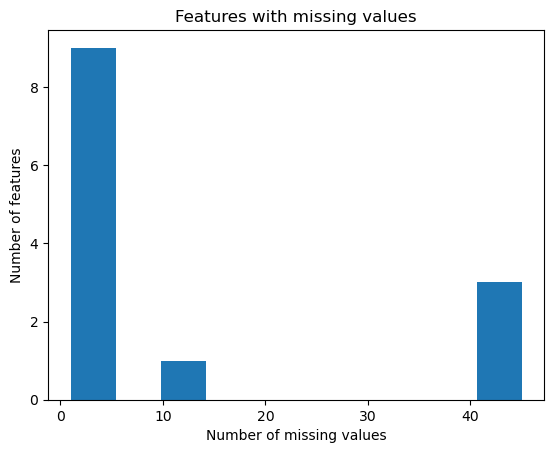

Features having more than 4 missing values
Number of new school drop-outs|2019                                                             13
Total number of secondary schools within 3 km|2019                                              45
Number of VMBO schools within 3 km|2019                                                         45
Number of HAVO/VWO schools within 3 km|2019                                                     45
Number of private households with income from unemployment benefits/national assistance|2019     5
dtype: int64


,Number of new school drop-outs|2019,Total number of secondary schools within 3 km|2019,Number of VMBO schools within 3 km|2019,Number of HAVO/VWO schools within 3 km|2019,Number of private households with income from unemployment benefits/national assistance|2019
0,5.0,NaN,NaN,NaN,49.0
1,NaN,NaN,NaN,NaN,10.0
2,7.0,NaN,NaN,NaN,49.0
3,35.0,NaN,NaN,NaN,490.0
4,19.0,NaN,NaN,NaN,601.0
5,28.0,NaN,NaN,NaN,479.0
6,19.0,NaN,NaN,NaN,304.0
7,55.0,NaN,NaN,NaN,1902.0
8,25.0,NaN,NaN,NaN,1426.0
9,NaN,NaN,NaN,NaN,8.0


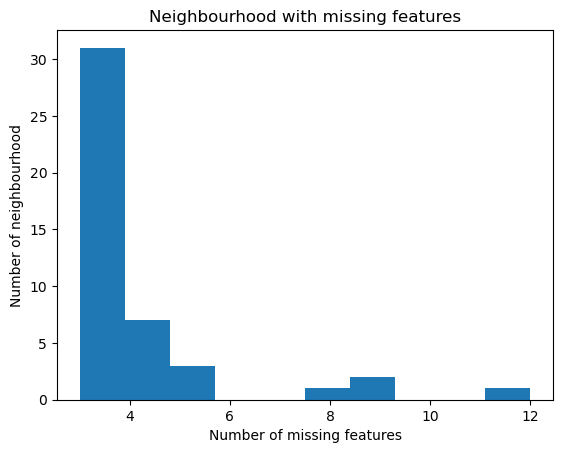

Neighbourhood having more than 5 missing values
9     35 Zuiderpark
17    01 Oostduinen
42      43 Forepark
44          Unknown
Name: Neighbourhood, dtype: object


,Neighbourhood,Number of participants in education|2019,Number of new school drop-outs|2019,5 to 14-year-olds|2019,15 to 19-year-olds|2019,Total number of secondary schools within 3 km|2019,Number of VMBO schools within 3 km|2019,Number of HAVO/VWO schools within 3 km|2019,Single parent|2019,Number of private households with income from employment|2019,Number of employed persons|2019,Number of private households with income from unemployment benefits/national assistance|2019,Number of private households with income from WIA benefits|2019,Number of private households with a low income|2019
9,35 Zuiderpark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,636.0,8.0,4.0,88.0
17,01 Oostduinen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1065.0,NaN,NaN,NaN
42,43 Forepark,6.0,NaN,NaN,9.0,NaN,NaN,NaN,5.0,NaN,9728.0,NaN,NaN,NaN
44,Unknown,267.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,51.0,NaN,NaN,36.0,NaN


In [4]:
fill_na_data = raw_data.iloc[:, 1:].copy()

# replace nan string with np.nan
nan_string = ["x", "-"]
for x in nan_string:
    fill_na_data.replace(x, np.nan, inplace=True)

# convert data from str to float64
fill_na_data = fill_na_data.astype("float64")

# replace negative values with np.nan
fill_na_data= fill_na_data.where(fill_na_data > 0, np.nan)

for col in subset_data_selected_year.columns[1:]:
    subset_data_selected_year[col] = fill_na_data[col]

# plot missing values count by features and by variables
feature_missing_value_count = subset_data_selected_year.iloc[:, 1:].isna().sum(axis=0)
plt.hist(feature_missing_value_count)
plt.title("Features with missing values")
plt.xlabel("Number of missing values")
plt.ylabel("Number of features")
plt.show()
print("Features having more than 4 missing values\n{}".format(feature_missing_value_count[feature_missing_value_count > 4]))
display(subset_data_selected_year[feature_missing_value_count[feature_missing_value_count > 4].index])

neighbourhood_missing_value_count = subset_data_selected_year.iloc[:, 1:].isna().sum(axis=1)
plt.hist(neighbourhood_missing_value_count)
plt.title("Neighbourhood with missing features")
plt.xlabel("Number of missing features")
plt.ylabel("Number of neighbourhood")
plt.show()
print("Neighbourhood having more than 5 missing values\n{}".format(subset_data_selected_year.Neighbourhood[neighbourhood_missing_value_count > 5]))
display(subset_data_selected_year[neighbourhood_missing_value_count > 5])

In [5]:
# for var in variables[1:]:
#     cols = get_column_name_match_string(raw_data, var)
#     # print(cols)
#     for n in raw_data.Neighbourhood.unique():
#         index = raw_data.Neighbourhood == n
#         print(raw_data.loc[index, cols])
#         raw_data.loc[index, cols].plot()
#         plt.show()

In [6]:
def create_new_column_from_sum(dataframe, columns, new_column_name="New column", removeOldColumn=False, loc=1):
    """Create a new column from the sum of the input columns
    Parameters:
    dataframe pd.DataFrame: the dataframe to add new column
    columns list: the list of columns to create the new column from their sum
    new_column_name str: new column name
    removeOldColumn bool: if True, the input columns will be removed
    loc int: location of the new column
    ----------
    Returns:
    pd.DataFrame"""
    column_value = dataframe[columns].sum(axis=1)
    dataframe.insert(loc=loc, column=new_column_name, value=column_value)
    if removeOldColumn:
        dataframe = dataframe.drop(columns=columns)
    return dataframe

# Use the data from the last valid year to fill in the missing value of each selected variable
for var in variables[1:]:
    col = get_column_name_match_string(fill_na_data, var)
    fill_na_data[col] = fill_na_data[col].ffill(axis=1)
    # display(fill_na_data[col].iloc[:, -5:].head(5))

for col in subset_data_selected_year.columns[1:]:
    subset_data_selected_year[col] = fill_na_data[col]

# remove neighbourhood with any NaN value
clean_subset_data = subset_data_selected_year.dropna(how="any")

# create column 'Total secondary schools within 3km|2019'
clean_subset_data = create_new_column_from_sum(clean_subset_data, \
                                               ['Total number of secondary schools within 3 km|2019', \
                                                'Number of VMBO schools within 3 km|2019', \
                                                'Number of HAVO/VWO schools within 3 km|2019'],\
                                              "Total secondary schools within 3km|2019", True, 3)
# create column '5 to 19 year-olds|2019'
clean_subset_data = create_new_column_from_sum(clean_subset_data,\
                                               ['5 to 14-year-olds|2019', \
                                                '15 to 19-year-olds|2019'],\
                                              "5 to 19 year-olds|2019", True, 3)

print("before filling missing values")
print("Neighbourhood count: {}; Variable count: {}".format(*raw_data[subset_data_selected_year.columns].shape))
# display(raw_data[subset_data_selected_year.columns])

print("after filling missing values")
print("Neighbourhood count: {}; Variable count: {}".format(*clean_subset_data.shape))
display(clean_subset_data)


before filling missing values
Neighbourhood count: 45; Variable count: 14
after filling missing values
Neighbourhood count: 33; Variable count: 11


,Neighbourhood,Number of participants in education|2019,Number of new school drop-outs|2019,5 to 19 year-olds|2019,Total secondary schools within 3km|2019,Single parent|2019,Number of private households with income from employment|2019,Number of employed persons|2019,Number of private households with income from unemployment benefits/national assistance|2019,Number of private households with income from WIA benefits|2019,Number of private households with a low income|2019
0,"14 Bohemen, Meer en Bos",203.0,5.0,482.0,18.0,234.0,1272.0,1152.0,49.0,76.0,1169.0
2,16 Kraayenstein en Vroondaal,348.0,7.0,990.0,11.0,393.0,1719.0,1573.0,49.0,75.0,793.0
3,17 Loosduinen,1189.0,35.0,2743.0,19.0,1389.0,4590.0,12056.0,490.0,382.0,3652.0
4,18 Waldeck,833.0,19.0,2129.0,20.0,1221.0,4141.0,7432.0,601.0,391.0,4659.0
5,31 Rustenburg en Oostbroek,1160.0,28.0,2962.0,25.0,1563.0,6621.0,3686.0,479.0,409.0,4324.0
6,32 Leyenburg,826.0,19.0,2064.0,22.0,1228.0,5016.0,5927.0,304.0,304.0,3504.0
7,33 Bouwlust/Vrederust,2302.0,55.0,5500.0,7.0,2422.0,7009.0,5574.0,1902.0,825.0,8339.0
8,34 Morgenstond,1229.0,25.0,3011.0,13.0,1738.0,5481.0,4137.0,1426.0,640.0,6111.0
10,36 Moerwijk,1385.0,45.0,3679.0,12.0,2128.0,5807.0,3283.0,1985.0,641.0,7350.0
11,40 Wateringse Veld,2227.0,38.0,5119.0,6.0,1693.0,5854.0,4263.0,308.0,300.0,2070.0


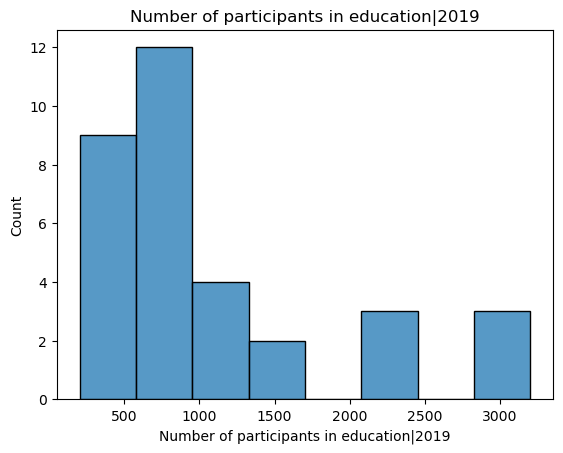

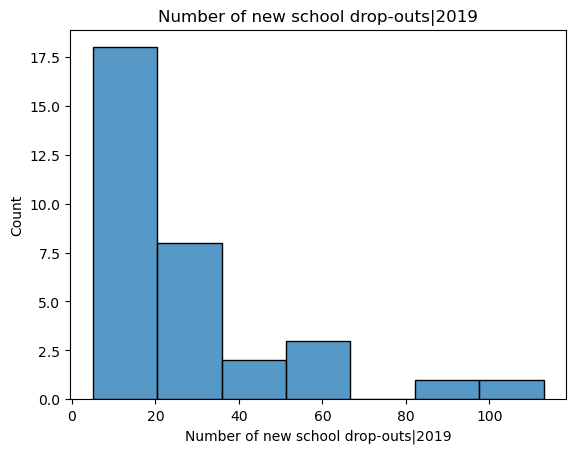

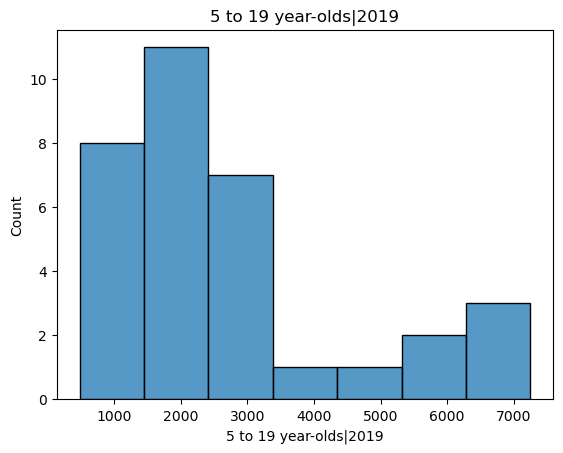

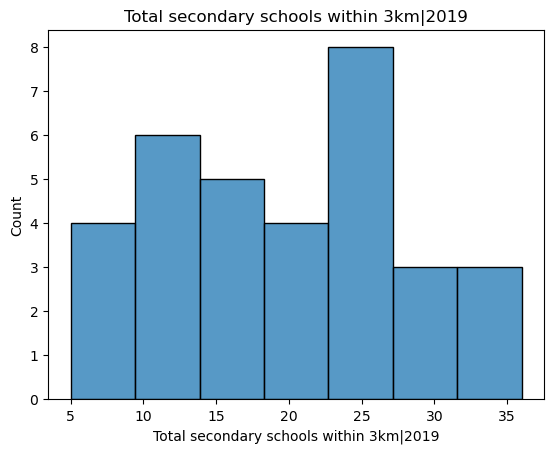

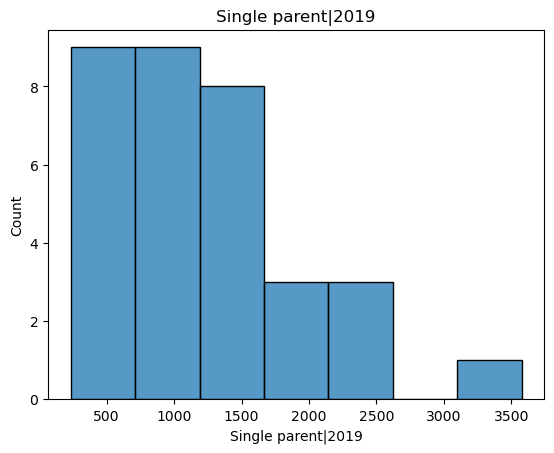

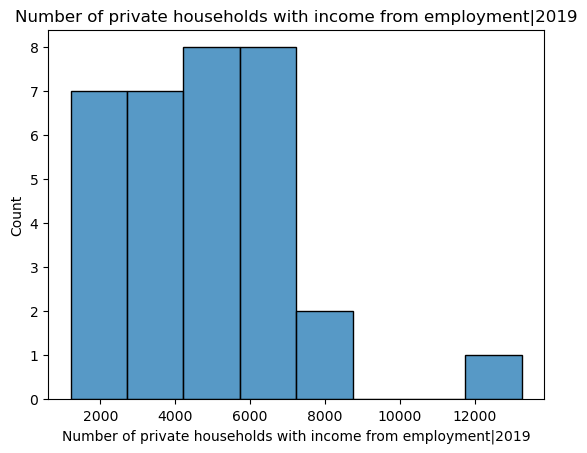

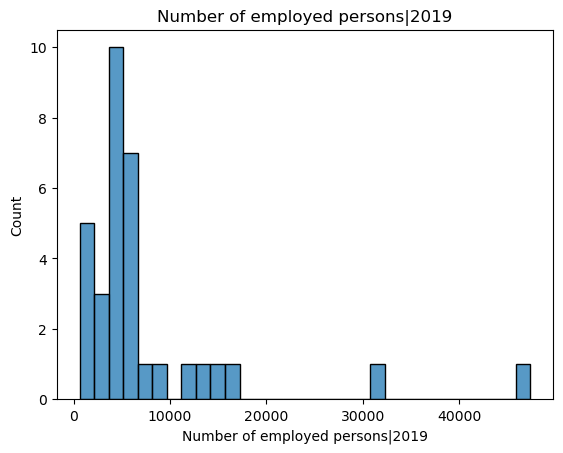

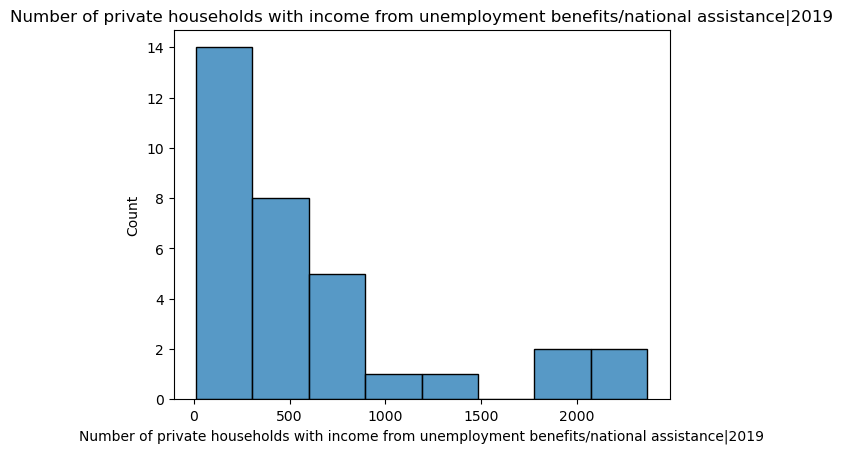

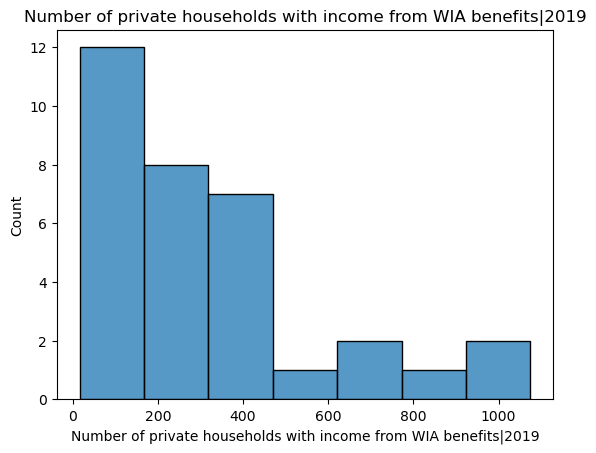

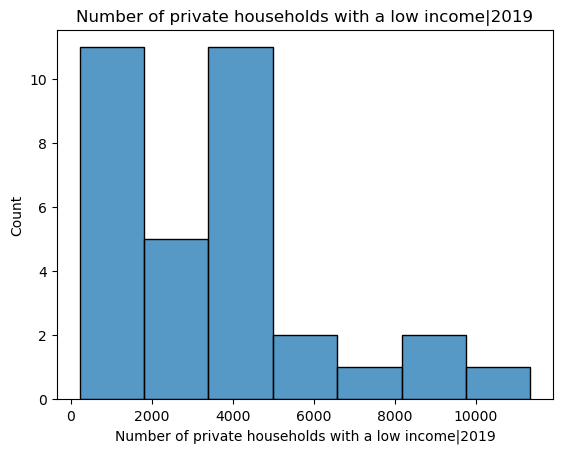

In [7]:
# plot histogram to view the clean data
for col in clean_subset_data.columns[1:]:
    sns.histplot(clean_subset_data[col])
    plt.title(col)
    plt.show()

## ``Task 4: Reshape the Data``
Reshaping data is a two-step process of melting and pivoting the data. Melting the data involves describing which data are indicators ("id") and which are variables for retrieval (“measure”). In this case your data may already be in melted form (long form). Pivoting then involves actually reshaping the data into the needed format. In this step, you have to reshape the data from long to wide format.
 
Pivoting the data involves specifying what data is on the rows and on the columns. Hint: functions melt and pivot offered by ``numpy`` library in python. For our analyses we want the neighborhood IDs to be on the rows, and to have all 4-7 variables as columns, where the value of each cell is the value taken from the column year that you chose at the subsetting step.

## ``Exercise: Reshape the Data``
- Do you need to melt and pivot the data in your specific case? Explain. 
- Examine the dimensions of the new datadrame if you had to pivot. Show it to us using head or print commands.
- Then rename all column names to something better and useful and easily addressable.  

# Answer

**Reshape the data**

I don't need to melt or pivot the data in my case. This is because:
* Each row is an observation
* Each column is a feature (independent or dependent variable) of the observation (e.g.: neighbourhood name, number of participants in education, etc. )

In [8]:
# rename the columns by removing the 
name_dict = {clean_subset_data.columns[i] : clean_subset_data.columns[i].split(sep="|")[0] for i in range(len(clean_subset_data.columns))}
clean_subset_data.rename(columns=name_dict, inplace=True)

display(clean_subset_data)

,Neighbourhood,Number of participants in education,Number of new school drop-outs,5 to 19 year-olds,Total secondary schools within 3km,Single parent,Number of private households with income from employment,Number of employed persons,Number of private households with income from unemployment benefits/national assistance,Number of private households with income from WIA benefits,Number of private households with a low income
0,"14 Bohemen, Meer en Bos",203.0,5.0,482.0,18.0,234.0,1272.0,1152.0,49.0,76.0,1169.0
2,16 Kraayenstein en Vroondaal,348.0,7.0,990.0,11.0,393.0,1719.0,1573.0,49.0,75.0,793.0
3,17 Loosduinen,1189.0,35.0,2743.0,19.0,1389.0,4590.0,12056.0,490.0,382.0,3652.0
4,18 Waldeck,833.0,19.0,2129.0,20.0,1221.0,4141.0,7432.0,601.0,391.0,4659.0
5,31 Rustenburg en Oostbroek,1160.0,28.0,2962.0,25.0,1563.0,6621.0,3686.0,479.0,409.0,4324.0
6,32 Leyenburg,826.0,19.0,2064.0,22.0,1228.0,5016.0,5927.0,304.0,304.0,3504.0
7,33 Bouwlust/Vrederust,2302.0,55.0,5500.0,7.0,2422.0,7009.0,5574.0,1902.0,825.0,8339.0
8,34 Morgenstond,1229.0,25.0,3011.0,13.0,1738.0,5481.0,4137.0,1426.0,640.0,6111.0
10,36 Moerwijk,1385.0,45.0,3679.0,12.0,2128.0,5807.0,3283.0,1985.0,641.0,7350.0
11,40 Wateringse Veld,2227.0,38.0,5119.0,6.0,1693.0,5854.0,4263.0,308.0,300.0,2070.0


<br/>

***

# ``Task 5: Saving the Results``

_Note:_ We do not need this file but we expect that if you learn how to save your data, it will be very useful in the future, as you do not need to run the script to clean your data again. 

- Save the cleaned dataframe as 'assignment-01-cleaned.csv' in your data folder
- Consider your final dataset. Reflect on why you think that this newly created dataset is appropriate/ not appropriate to asnwer your research question.


# Answer

I think that this newly created dataset is only appropriate to answer a my research question at a very limited scope, which is defined by the availability of the data. In particular:
1. Among the 2 dependent variables, 'Number of participants in education' is more reliable than 'Number of new school drop-out'. This is because there are complete data for the first dependent variable, whereas there are 13 missing values for the second one.
1. The popolation group of interests is restricted to the age range in secondary school, i.e. 12-18 years old, because for the hypothesis about **Distance to schools**, there are only available data for secondary institutions. Additionally, the latest available data is dated in 2013, whereas the year of analysis for the dependent variables is 2019. However, based on the assumption that the number of school barely fluctuate over the years, it is still reliable to use the data in the year 2013 to fill in the missing data for the year 2019.


In [9]:
output_file_path = os.path.join("data", "assignment-01-cleaned.csv")
clean_subset_data.to_csv(output_file_path, index=False)